<table align="left">
  <td>
    <a target="_blank" href="https://www.kaggle.com/mateuszszczepanek/cnn-digits-recognizer"><img src="https://cdn.iconscout.com/icon/free/png-128/kaggle-3628869-3030009.png" />Open in Kaggle</a>
  </td>
</table>

### 1. Importing ***modules***

In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

### 2. Loading ***MNIST dataset***
#### The **MNIST dataset** is an acronym that stands for the Modified National Institute of Standards and Technology dataset.
#### It is a dataset of **60,000 small square 28×28 pixel** grayscale images of handwritten single digits between **0** and **9**.

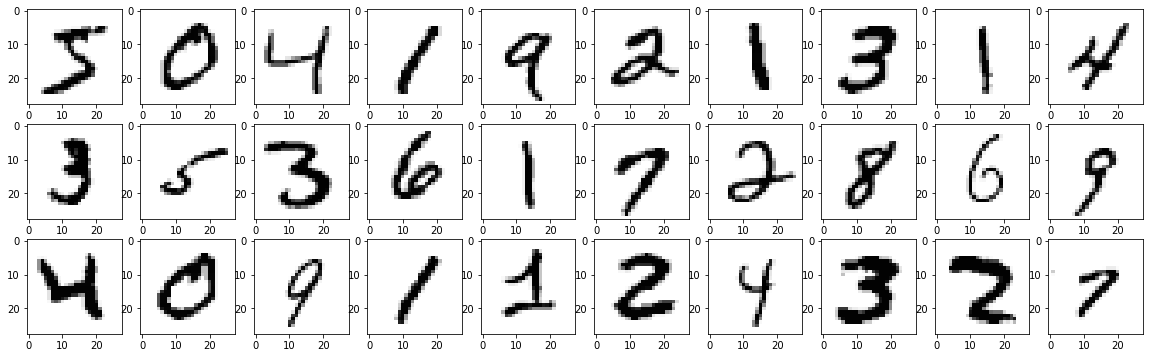

Shape of training data: (60000, 28, 28)
Shape of testing data: (10000, 28, 28)


In [2]:
file = np.load("mnist.npz")

# Dividing into training and testing data
X_train, y_train = file['x_train'], file['y_train']
X_test, y_test = file['x_test'], file['y_test']

# Visualizing data
plt.figure(figsize=(20,6))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap="Greys")
plt.show()

# Checking the size of train and test data
print("Shape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)

In [15]:
np.set_printoptions(linewidth=150)
print(X_train[12345])
print(f"\nThis is digit '{y_train[12345]}'")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  12  46 136 236 254 254 255 254 134   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 103 217 253 253 253 253 253 253 253 228  32   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  73 212 253 253 253 253 253 253 253 253 253 253 150   8   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  25 203 253 253 253 253 253 253 222 185 253 25

In [16]:
# Normalizing data in range 0 - 1
X_train = X_train / 255
X_test = X_test / 255

In [17]:
# To avoid this error:
#   ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (32, 28, 28)
# Have to reshape X_train and X_test

print(f"Initial shape: \n\tX_train {X_train.shape} \n\tX_test {X_test.shape}")

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1 )
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1 )
print(f"\nAfter reshape: \n\tX_train {X_train.shape} \n\tX_test {X_test.shape}")

Initial shape: 
	X_train (60000, 28, 28) 
	X_test (10000, 28, 28)

After reshape: 
	X_train (60000, 28, 28, 1) 
	X_test (10000, 28, 28, 1)


### 3. Developing a ***Model***

In [18]:
model = Sequential()


# Input layer
model.add( Conv2D( 32, kernel_size=(4, 4), input_shape= (28, 28, 1), activation="relu" ) )

# Hidden layers
model.add( Flatten() )
model.add( Dense(units=128, activation= "relu" ) )

# Output layers
model.add( Dense(units=10, activation="softmax") )


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
result = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2513 - accuracy: 0.9229 - val_loss: 0.0605 - val_accuracy: 0.9788
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0426 - accuracy: 0.9864 - val_loss: 0.0422 - val_accuracy: 0.9854
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0219 - accuracy: 0.9928 - val_loss: 0.0502 - val_accuracy: 0.9848
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0120 - accuracy: 0.9962 - val_loss: 0.0507 - val_accuracy: 0.9850
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0080 - accuracy: 0.9975 - val_loss: 0.0709 - val_accuracy: 0.9818
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.0647 - val_accuracy: 0.9844
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0639 -

In [19]:
df = pd.DataFrame(result.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.129425,0.960350,0.060490,0.9788
1,0.041068,0.986917,0.042169,0.9854
2,0.023812,0.992000,0.050249,0.9848
3,0.014129,0.995250,0.050743,0.9850
4,0.010287,0.996450,0.070876,0.9818
5,0.006686,0.997900,0.064736,0.9844
6,0.004670,0.998483,0.063901,0.9854
7,0.005734,0.997817,0.066687,0.9851
8,0.004299,0.998600,0.075037,0.9849
9,0.004150,0.998667,0.073819,0.9853


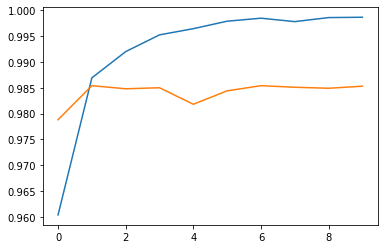

In [20]:
plt.plot(df[ ["accuracy", "val_accuracy"] ])
plt.show()

In [21]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0738 - accuracy: 0.9853


[0.07381901890039444, 0.9853000044822693]

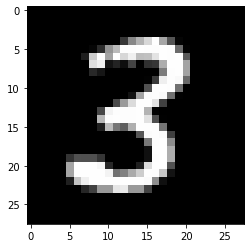

3 - Actaul digit      
3 - Digit predicted by model


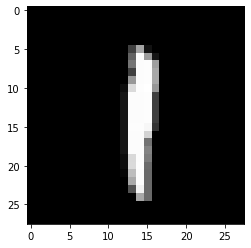

1 - Actaul digit      
1 - Digit predicted by model


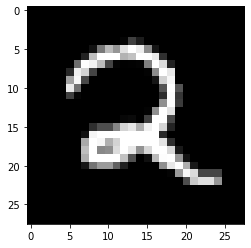

2 - Actaul digit      
2 - Digit predicted by model


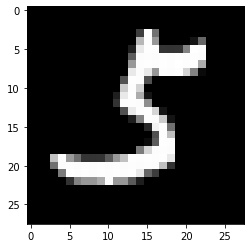

5 - Actaul digit      
5 - Digit predicted by model


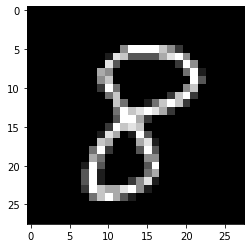

8 - Actaul digit      
8 - Digit predicted by model


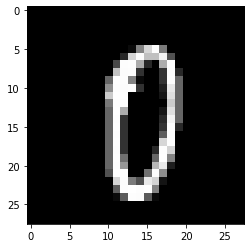

0 - Actaul digit      
0 - Digit predicted by model


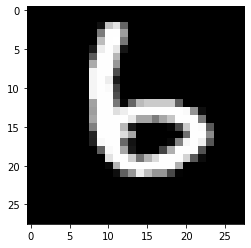

6 - Actaul digit      
6 - Digit predicted by model


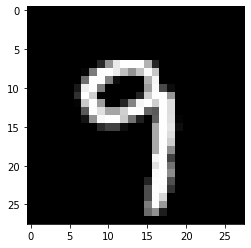

9 - Actaul digit      
9 - Digit predicted by model


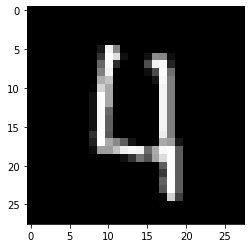

4 - Actaul digit      
4 - Digit predicted by model


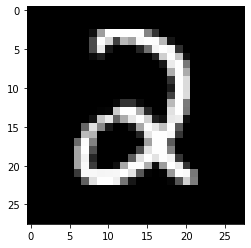

2 - Actaul digit      
2 - Digit predicted by model


In [26]:
# Checking model
for n in random.sample(range(len(X_test)), 10):
    sample = X_test[n].reshape(28, 28)    
    plt.imshow(sample, "gray")
    plt.show()
    print(f"{y_test[n]} - Actaul digit  \
    \n{model.predict_classes( sample.reshape(1, 28, 28, 1) )[0]} - Digit predicted by model")

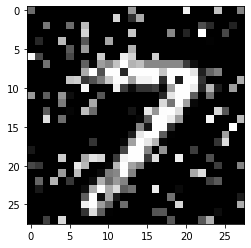

0  0.0 %
1  0.0 %
2  1.17 %
3  0.0 %
4  0.0 %
5  0.0 %
6  0.0 %
7  98.83 %
8  0.0 %
9  0.0 %

Actaul digit 7 
Predicted digit: 7


In [86]:
# Making the sample more 'dirty'

INDEX = random.choice(range(len(X_train)))
sample_tmp = np.copy(X_train[INDEX])

for _ in range(150):
  x, y = np.random.randint(0, 28), np.random.randint(0, 28)
  sample_tmp[x, y] = np.random.rand()
plt.imshow(sample_tmp, "gray")
plt.show()

for x in range(10):
  print(f"{x} ", round(model.predict_proba(sample_tmp.reshape(1, 28, 28, 1))[0][x] * 100, 2), "%")
print(f"\nActaul digit {y_train[INDEX]} \
\nPredicted digit: {model.predict_classes( sample_tmp.reshape(1, 28, 28, 1))[0]}")

### 4. Creating a ***heatmap*** to see *which digit* is most often confused with *which digit*.

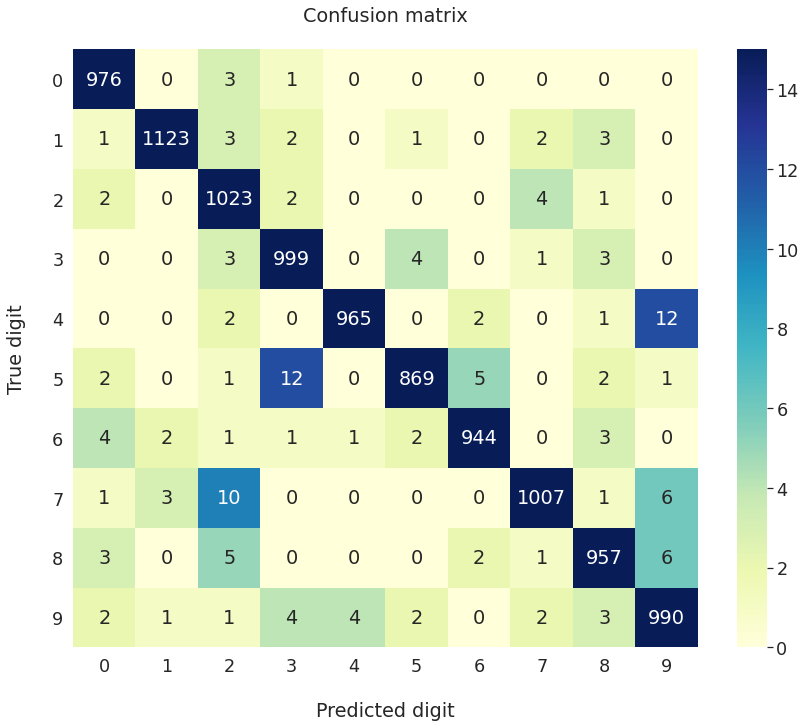

In [87]:
test_predictions = model.predict(X_test)
confusion = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))

sns.set(rc={'figure.figsize':(14,11)})
sns.set(font_scale=1.6)

sns.heatmap(confusion, annot=True, fmt='g', vmax=15, cmap='YlGnBu')
plt.title("Confusion matrix\n")
plt.ylabel("True digit\n")
plt.yticks(rotation=0)
plt.xlabel("\nPredicted digit")

plt.show()